In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 18})
current_palette = sns.color_palette()


In [23]:
#column_names = ['timeA','VA']
#dataA = pd.read_csv('A/CH3.CSV', skiprows=1, names=column_names)
#column_names = ['timeAgen','VAgen']
#dataAgen = pd.read_csv('A/CH1.CSV', skiprows=1, names=column_names)


FULLDATA = pd.DataFrame({'A' : []})

frames = []
#names=['cathode']
names = ['AnodeOnlyVLite','CathodeOnlyVLite','sum']
#voltages = [2,5,10,15,20,25,30]
#channels = [1,2,3,5]
channels = [2]
for i in names:
    for j in channels:
        location = 'May4_Rewire/'+i+'/CH'+str(j)+'.CSV'
        timelabel = 'time_'+ i +"V_CH"+str(j)
        vlabel = 'V_'+ i +"CH"+str(j)
        ColumnNames = [timelabel,vlabel]
        dataA = pd.read_csv(location,skiprows=1,names=ColumnNames)
        frames = [FULLDATA,dataA]
        FULLDATA=pd.concat(frames,axis=1)
        
FULLDATA =FULLDATA.drop('A',1)

cnnames = FULLDATA.columns.get_values()
for k in cnnames:
    if k.startswith('time') == True:
        #print(k)
        FULLDATA[k] = FULLDATA[k] * 1E6
        #FULLDATA[k] = FULLDATA[k] - 0.1


#FULLDATA['time_cathnormV_CH2'] = FULLDATA['time_cathodeV_CH2']
#FULLDATA['V_cathnormCH2'] = FULLDATA['V_cathodeCH2'] * (-.3)

#FULLDATA['time_computedV_CH2'] = FULLDATA['time_cathodeV_CH2']
#FULLDATA['V_computedCH2'] = FULLDATA['V_cathodeCH2']+FULLDATA['V_anodeCH2']

#FULLDATA['time_residualV_CH2'] = FULLDATA['time_computedV_CH2']
#FULLDATA['V_residualCH2'] = FULLDATA['V_computedCH2']-FULLDATA['V_sumCH2']


FULLDATA

,time_cathodeV_CH2,V_cathodeCH2
0,-600.0000,0.000293
1,-599.9992,0.000098
2,-599.9984,0.000684
3,-599.9976,0.000879
4,-599.9968,0.000684
5,-599.9960,-0.000293
6,-599.9952,-0.001270
7,-599.9944,-0.000488
8,-599.9936,-0.000684
9,-599.9928,-0.000488


In [26]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
#print(datetimeforplots)

def plotpulses(): ### HVS=[0,1,2,3]
    tau = np.empty((0,2), float)
    print (tau)
    #names = ['anode','cathnorm']
    #names = ['cathode','anode','sum','computed']
    names = ['cathode']

    for name in names:
        
        j = 2
        timelabel = 'time_'+ name +"V_CH"+str(j)
        vlabel = 'V_'+ name +"CH"+str(j)
        #FitData = FULLDATA[(FULLDATA[timelabel]>=-100) & (FULLDATA[timelabel]<=100)]

        
        #vlabelshort = str(i)+'V'
        #Title = 'Risetime vs. Voltage, HVS' + label + ', V=' + str(voltage)

        #print (stau)
        #        tau = np.append(tau, stau, axis=0)
        
        #tau =  '%s' % float('%.3g' % popt[1])
        #tauerr=  '%s' % float('%.3g' % pcov[1,1])
        #plt.text(.6,-10,'$tau  = $'+str(tau)+' usec '+'($\pm$'+tauerr+' usec)')
        

        if name == 'cathode':
            ax=FULLDATA.plot(timelabel,vlabel,label=name)
        else:
            #continue
            FULLDATA.plot(timelabel,vlabel,label=name,ax=ax)
    
    plt.xlim([0,20])
    #plt.ylim([-.5,.2])
    plt.xlabel("Time (us)")
    plt.ylabel('Voltage (V)')
    plt.title('Testing Anode/Cathode Signal')
    #plt.legend().set_visible(False)
    #print (tau)
    #plt.savefig('AnodeCathodePlots_'+datetimeforplots+'.pdf')
    return plt.show()

[]


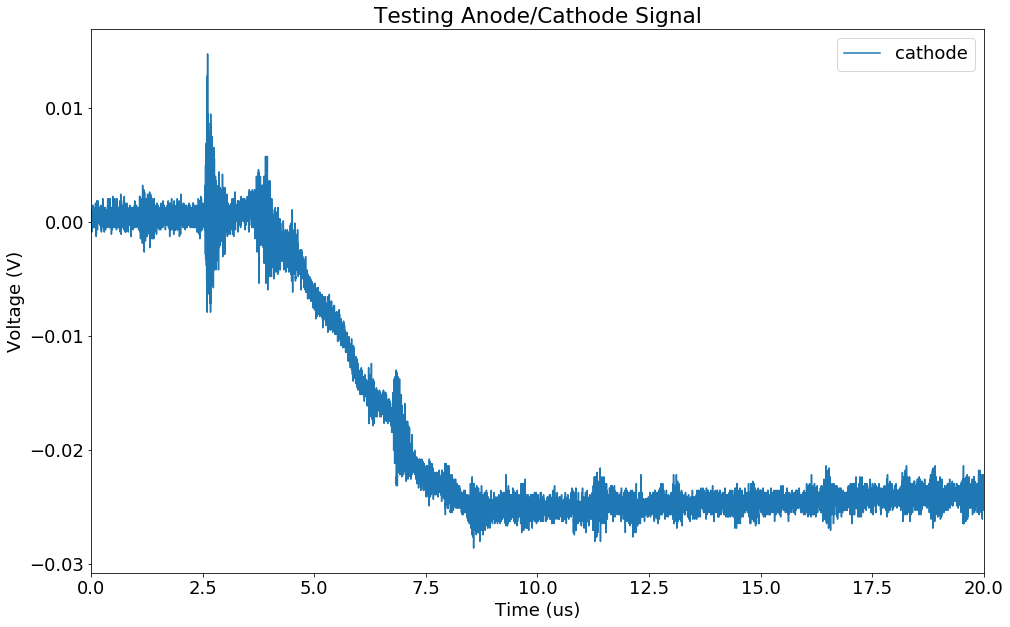

In [27]:
plotpulses()

In [14]:
def plotresidual(): ### HVS=[0,1,2,3]
    tau = np.empty((0,2), float)
    print (tau)
    names = ['residual']

    for name in names:
        j = 2
        timelabel = 'time_'+ name +"V_CH"+str(j)
        vlabel = 'V_'+ name +"CH"+str(j)
        #FitData = FULLDATA[(FULLDATA[timelabel]>=-100) & (FULLDATA[timelabel]<=100)]

        
        #vlabelshort = str(i)+'V'
        #Title = 'Risetime vs. Voltage, HVS' + label + ', V=' + str(voltage)

        #print (stau)
        #        tau = np.append(tau, stau, axis=0)
        
        #tau =  '%s' % float('%.3g' % popt[1])
        #tauerr=  '%s' % float('%.3g' % pcov[1,1])
        #plt.text(.6,-10,'$tau  = $'+str(tau)+' usec '+'($\pm$'+tauerr+' usec)')
        

        if name == 'residual':
            ax=FULLDATA.plot(timelabel,vlabel,label=name)
        else:
            #continue
            FULLDATA.plot(timelabel,vlabel,label=name,ax=ax)
    
    #plt.xlim([-.1,100])
    #plt.ylim([30,120])
    plt.xlabel("Time(us)")
    plt.ylabel('Voltage (V)')
    plt.title('Testing Anode/Cathode Signal, Residual')
    #plt.legend().set_visible(False)
    #print (tau)
    #plt.savefig('AnodeCathodePlotsResidual_'+datetimeforplots+'.pdf')
    return plt.show()

[]


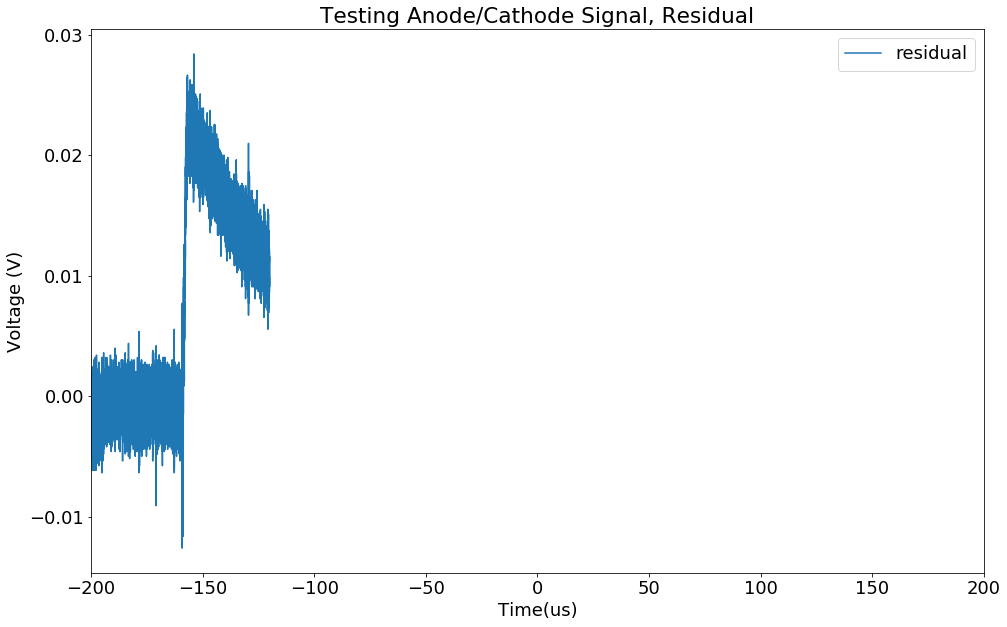

In [15]:
plotresidual()

In [ ]:
def comparepulses(): ### HVS=[0,1,2,3]
    tau = np.empty((0,2), float)
    print (tau)
    names = ['anode','cathnorm']
    #names = ['sum','anode','cathode','computed']

    for name in names:
        j = 2
        timelabel = 'time_'+ name +"V_CH"+str(j)
        vlabel = 'V_'+ name +"CH"+str(j)
        
        #vlabelshort = str(i)+'V'
        #Title = 'Risetime vs. Voltage, HVS' + label + ', V=' + str(voltage)

        #print (stau)
        #        tau = np.append(tau, stau, axis=0)
        
        #tau =  '%s' % float('%.3g' % popt[1])
        #tauerr=  '%s' % float('%.3g' % pcov[1,1])
        #plt.text(.6,-10,'$tau  = $'+str(tau)+' usec '+'($\pm$'+tauerr+' usec)')
        

        if name == 'anode':
            ax=FULLDATA.plot(timelabel,vlabel,label=name)
        else:
            #continue
            FULLDATA.plot(timelabel,vlabel,label=name,ax=ax)
    
    plt.xlim([-.1,10])
    #plt.ylim([-.5,.2])
    plt.xlabel("Time (us)")
    plt.ylabel('Voltage (V)')
    plt.title('Testing Anode/Cathode Signal')
    #plt.legend().set_visible(False)
    #print (tau)
    #plt.savefig('AnodeCathodePlots_'+datetimeforplots+'.pdf')
    return plt.show()